In [18]:
# настройки и библиотеки
import pandas as pd
import numpy as np
import json as js
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%config InlineBackend.figure_format = 'png' 

# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,8

Populating the interactive namespace from numpy and matplotlib


Читаем файл, готовим данные для работы.

In [19]:
raw_ds=pd.read_csv('tmdb_5000_movies.csv')
raw_ds.head()
raw_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [20]:
name_col=['budget','genres','production_countries','original_language','title','popularity','revenue','status',\
          'release_date','vote_average','vote_count']
film=raw_ds[name_col]
film.head(3)

,budget,genres,production_countries,original_language,title,popularity,revenue,status,release_date,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",en,Avatar,150.437577,2787965087,Released,2009-12-10,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",en,Pirates of the Caribbean: At World's End,139.082615,961000000,Released,2007-05-19,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",en,Spectre,107.376788,880674609,Released,2015-10-26,6.3,4466


In [21]:
film = film.dropna()
film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 11 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
production_countries    4802 non-null object
original_language       4802 non-null object
title                   4802 non-null object
popularity              4802 non-null float64
revenue                 4802 non-null int64
status                  4802 non-null object
release_date            4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 450.2+ KB


Для анализа не подходит текущий формат даты, меняем ее тип, значение берем только год.

In [22]:
film['release_date'] =  pd.DatetimeIndex(pd.to_datetime(film['release_date'])).year
film.head(3)

,budget,genres,production_countries,original_language,title,popularity,revenue,status,release_date,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",en,Avatar,150.437577,2787965087,Released,2009,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",en,Pirates of the Caribbean: At World's End,139.082615,961000000,Released,2007,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",en,Spectre,107.376788,880674609,Released,2015,6.3,4466


Посмотрим на boxplot как распределяются оценки пользователей в зависимости от языка, на котором выходил фильм.
Взяла первые 10 самых популярных языков. Участвуют категориальные (language, object) и номинальные данные (vote_average , float)

In [23]:
lang = film.original_language.value_counts().sort_values(ascending = False).head(10).index.values

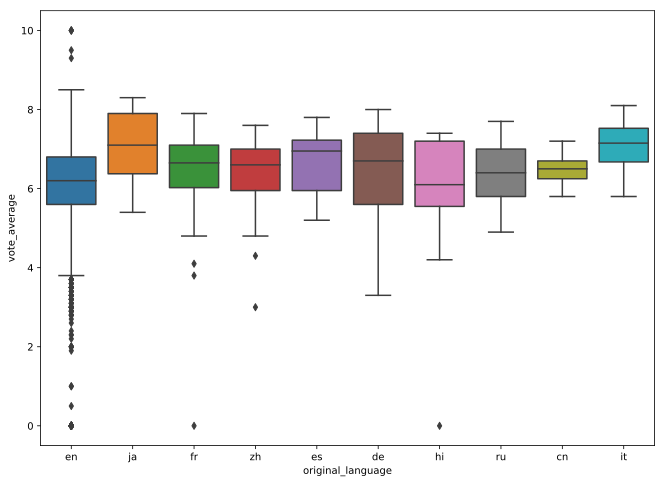

In [24]:
sns.boxplot(x="original_language", y="vote_average",data=film[film.original_language.isin(lang)])

В принципе пользователи ставят высокую оценку всем фильмам, представленных в выборке,
медиана колеблется в пределах 6-8 баллов. Но на английском языке представлено много фильмов с низким рейтингом.
(нужно помнить, что здесь включены все фильмы англоговорящих стран)

Рассмотрим pairplot, где, возможно, найдем интересные зависимости. 

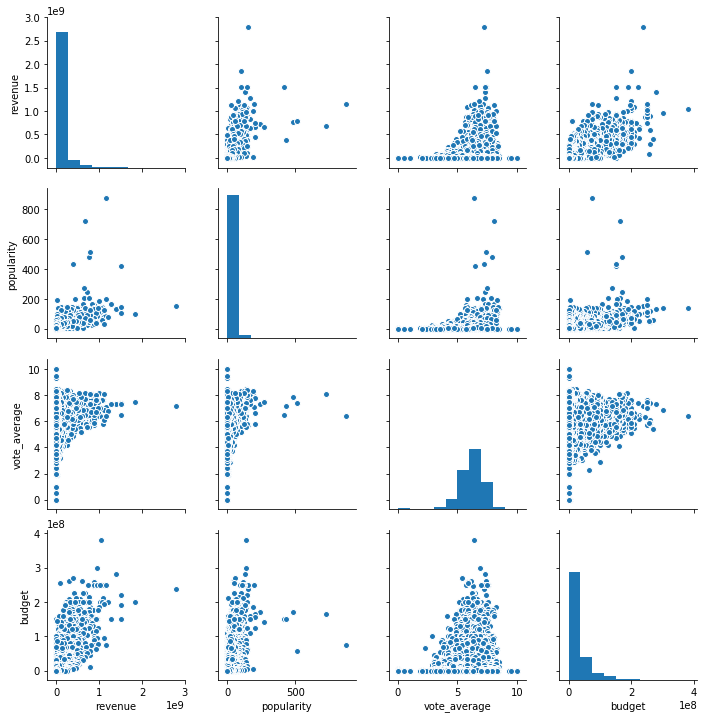

In [25]:
%config InlineBackend.figure_format = 'png'
sns_plot = sns.pairplot(film[['revenue','popularity','vote_average','budget']],kind='scatter');

Ожидаемо больше выручка, популярность и оценка пользователей у фильмов с большим бюджетом. 
Также можно попробовать построить зависимость оценки пользователей от бюджета фильма.  И заодно попытаться найти зависимость на графике regplot. Участвуют номинальные данные типа float

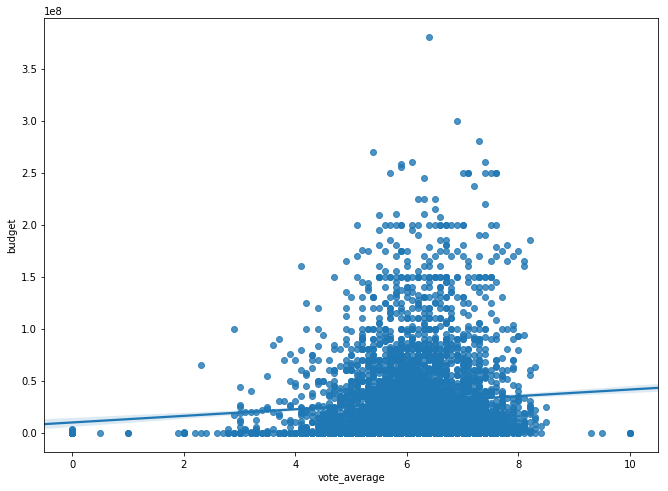

In [26]:
sns_plot2=sns.regplot(x='vote_average', y='budget', data=film);

Жанры, и страны участницы могут дать много интересной информации. Вытащим эти данные. 
2 функции для чтения строк json для жанров и стран-участниц в производстве фильмов.

In [27]:
# функции заполнить жанры, а также для стран, участвующих в создании фильма
def country(x):
    film_country=[]
    for i in js.loads(x):
        film_country.append(i['iso_3166_1'])
    return str(sort(film_country))

def genres(x):
    film_genres=[]
    for i in js.loads(x):
        film_genres.append(i['name'])
    return str(sort(film_genres))

In [28]:
# колонка для названия стран-производителей
film['country_name']=film['production_countries'].apply(lambda x: country(x))

In [29]:
# колока с названиями жанров фильмов
film['film_genres']=film['genres'].apply(lambda x: genres(x))

In [30]:
# колонка с числом жанров фильма
film['country_N']=film['production_countries'].apply(lambda x: len(js.loads(x)))

In [31]:
# колонка с числом стран-участниц
film['genres_N']=film['genres'].apply(lambda x: len(js.loads(x)))

Построим график популярных по жанрам фильмов, первая двадцатка. Категориальные данные object

In [32]:
#f1 = film[['film_genres','popularity','genres_N']]
f1 = film.groupby('film_genres')['popularity'].sum().sort_values(ascending = False).head(20)
f1

film_genres
['Drama']                                              5091.125530
['Comedy']                                             4758.276471
['Action' 'Adventure' 'Science Fiction']               3383.413829
['Drama' 'Romance']                                    2640.747046
['Comedy' 'Drama' 'Romance']                           2468.837790
['Action' 'Adventure' 'Fantasy']                       2449.031223
['Comedy' 'Romance']                                   2423.952790
['Adventure' 'Animation' 'Comedy' 'Family']            2305.970582
['Action' 'Adventure' 'Science Fiction' 'Thriller']    2239.658740
['Comedy' 'Drama']                                     2140.320913
['Crime' 'Drama' 'Thriller']                           2137.822996
['Action' 'Adventure' 'Thriller']                      1916.166330
['Horror' 'Thriller']                                  1901.344481
['Crime' 'Drama']                                      1586.760027
['Action' 'Crime' 'Thriller']                     

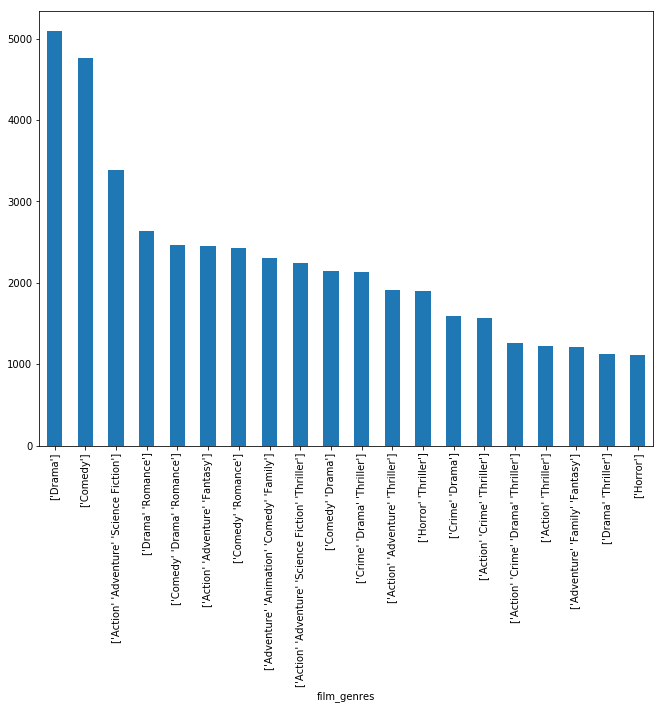

In [33]:
f1.plot(kind='bar')

Самые популярные фильмы драмы и комедии, далее сочетания жанров.

Посмотрим, чьи фильмы наиболее популярные. Участвуют категориальные данные country_name, object. 

Как видим, лидирует США, и далее они в содружестве с другими странами.

In [34]:
f2 = film.groupby('country_name')['popularity'].sum().sort_values(ascending = False).head(20)

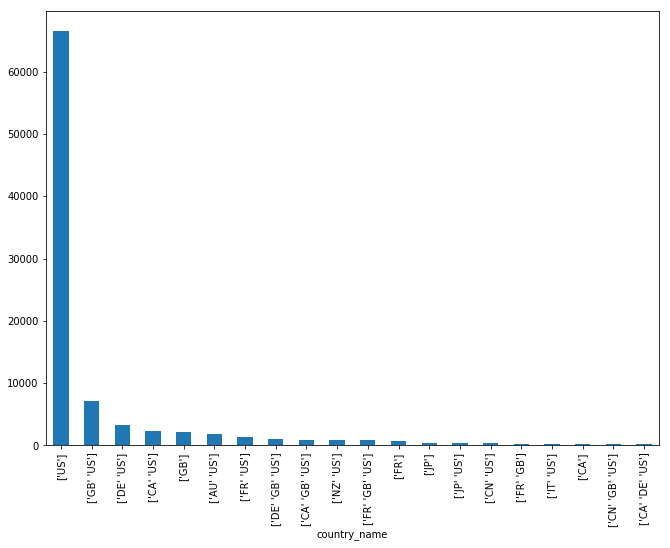

In [35]:
f2.plot(kind = 'bar')

In [36]:
# маски для отбора лидирующих стран и жанров
country = film.country_name[film['country_N']>0].value_counts().sort_values(ascending = False).head(10).index.values

In [37]:
genres = film.film_genres[film['genres_N']>0].value_counts().sort_values(ascending = False).head(10).index.values

Напоследок посмотрим на Heatmap тепловые карты, так как визуально показательны, по ним легко строить оценки и предположения.

1) Как зависит выручка фильма от числа участниц стран и жанров в фильме. Участвуют категориальные (число жанров фильма и число стран-участниц, int) и номинальные данные (выручка, float)

In [38]:
f3 = film.pivot_table( index = ['country_N'], columns=['genres_N'], 
                      values = ['revenue'], aggfunc = np.mean ).fillna(0).applymap(float)
f3

revenue                                                          \
genres_N         0             1             2             3             4   
country_N                                                                    
0          83636.5  5.166480e+05  9.165730e+05  7.329052e+05  1.400000e+00   
1              0.0  4.622189e+07  6.015042e+07  1.026170e+08  1.194453e+08   
2              0.0  5.029864e+07  6.015861e+07  1.327414e+08  1.517098e+08   
3              0.0  2.630783e+07  6.060705e+07  1.036209e+08  1.021578e+08   
4              0.0  5.879871e+07  6.494910e+07  1.266391e+08  1.258998e+08   
5              0.0  2.004382e+07  1.005076e+07  1.260489e+08  5.936942e+07   
6              0.0  0.000000e+00  0.000000e+00  7.938872e+06  0.000000e+00   
7              0.0  6.749180e+05  0.000000e+00  0.000000e+00  0.000000e+00   
8              0.0  0.000000e+00  0.000000e+00  2.288902e+07  0.000000e+00   
12             0.0  0.000000e+00  0.000000e+00  4.003188e+07  0.000000e+00   

                                                   
genres_N              5             6           7  
country_N                                          
0          2.782784e+06  0.000000e+00         0.0  
1          1.430465e+08  1.361127e+08  35519315.5  
2          1.231771e+08  3.686775e+07         0.0  
3          5.361546e+07  7.791055e+07         0.0  
4          1.070762e+08  3.349013e+08         0.0  
5          2.116432e+08  0.000000e+00         0.0  
6          0.000000e+00  1.672982e+08         0.0  
7          0.000000e+00  0.000000e+00         0.0  
8          1.770916e+07  0.000000e+00         0.0  
12         0.000000e+00  0.000000e+00         0.0

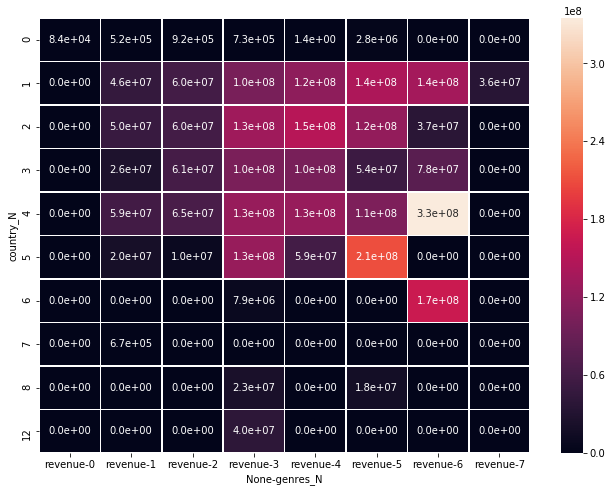

In [39]:
sns.heatmap(f3, annot=True, fmt="0.1e", linewidths=.5);

Высокая выручка от производства фильма, тогда когда он охватывает несколько жанров и в производстве участвуют несколько стран.

Посмотрим на зависимость популярости фильма от жанра и страны, которая участвовала в создании (первые десятки). Категориальные данные - названия стран-участниц и жанры, str, номинальные данные - популярность, float.

In [40]:
f4 = film.pivot_table( index = film.country_name[film.country_name.isin(country)], 
                      columns=film.film_genres[film.film_genres.isin(genres)], \
                      values = 'popularity',aggfunc = np.mean).fillna(0)\
                       .applymap(float)
f4

film_genres,['Comedy' 'Drama' 'Romance'],['Comedy' 'Drama'],['Comedy' 'Romance'],['Comedy'],['Crime' 'Drama' 'Thriller'],['Documentary'],['Drama' 'Romance'],['Drama' 'Thriller'],['Drama'],['Horror' 'Thriller']
country_name,,,,,,,,,,
['AU' 'US'],0.000000,2.678715,15.853670,11.051492,0.000000,0.545825,33.783169,0.000000,0.000000,21.262139
['CA' 'US'],13.601897,3.125117,11.761865,15.018346,23.911181,0.097913,44.135568,0.231297,22.879780,23.604946
['CA'],0.000000,1.688495,2.080741,1.791708,0.000000,7.676677,0.000000,0.000000,2.542474,4.702182
['DE' 'GB' 'US'],4.733832,27.941215,21.999303,0.000000,17.917037,0.000000,0.000000,7.029126,16.774075,0.000000
['DE' 'US'],8.424786,7.957351,12.763004,25.161904,17.936909,0.000000,15.022427,8.807341,25.161501,21.394284
['FR' 'US'],0.000000,0.000000,21.857387,2.267780,11.473377,0.895946,6.713919,0.000000,14.361503,59.041849
['FR'],8.005628,8.965162,11.609210,8.484387,2.486992,0.092562,6.932633,0.000000,9.033724,0.000000
['GB' 'US'],20.890022,15.827308,22.634757,7.797343,18.382080,1.750417,13.480653,18.520240,12.978788,31.160062
['GB'],11.757873,7.161161,5.568992,6.806873,12.809135,0.399595,14.172399,0.000000,17.996197,22.832267


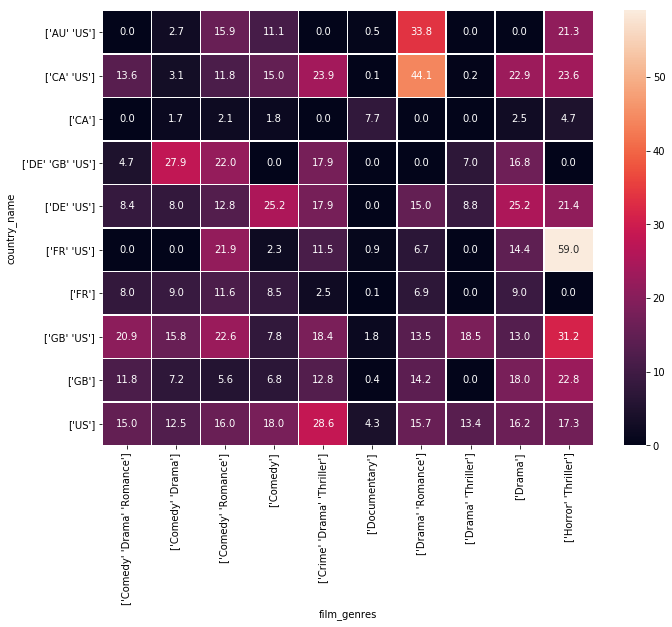

In [41]:
sns.heatmap(f4, annot=True, fmt="0.1f", linewidths=.5);

В основном это фильмы с участием США, также можно отметить популярностть жанров триллер, хорор, комедия и драма, 
а также их комбинации.